In [1]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


Welcome to JupyROOT 6.16/00


### Get Data and MC files

In [2]:
#pPb
MCfile_name0 = '/home/dhruv/13b2_16_21bins_1GeV30GeV_4L_Allevents.root'
MCfile_name1 = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root'
MCfile_name2 = '/home/dhruv/13b2_16_37bins_publishedBinning15GeV_1Mevents_noNormalize_allReco_new.root'
MCfile_name3 = '/home/dhruv/13b2_16_58bins_publishedBinning15GeV_1Mevents_noNormalize_allReco_new.root'
MCfile_name4 = '/home/dhruv/13b2_16_37bins_publishedBinning15GeV_Allevents_noNormalize_allReco_new.root'


MCfile0 = ROOT.TFile(MCfile_name0)
MCfile1 = ROOT.TFile(MCfile_name1)
MCfile2 = ROOT.TFile(MCfile_name2)
MCfile3 = ROOT.TFile(MCfile_name3)
MCfile4 = ROOT.TFile(MCfile_name4)


## Get response Matrix, normalize it, plot it

-0.38095238095238093 	 0.30952380952380953 	 1.0 	 1.0051078477321356
1.0 	 1.5 	 2.0 	 0.9903656575438352
2.0 	 2.5 	 3.0 	 0.9860434608163516
3.0 	 3.5 	 4.0 	 0.9599828701689732
4.0 	 4.5 	 5.0 	 0.9264421336689912
5.0 	 5.5 	 6.0 	 0.8926757038573313
6.0 	 6.5 	 7.0 	 0.8465685249465592
7.0 	 7.5 	 8.0 	 0.809613968191922
8.0 	 8.5 	 9.0 	 0.7521111053848611
9.0 	 9.5 	 10.0 	 0.6742518700186136
10.0 	 10.5 	 11.0 	 0.6808219245389237
11.0 	 11.5 	 12.0 	 0.6422275570303324
12.0 	 12.5 	 13.0 	 0.4873563181015753
13.0 	 13.5 	 14.0 	 0.40423862180975434
14.0 	 14.5 	 15.0 	 0.366935479555977
15.0 	 15.5 	 16.0 	 0.33205128225618913
16.0 	 17.0 	 18.0 	 0.25127768332320455
18.0 	 19.0 	 20.0 	 0.233539095608864
20.0 	 21.0 	 22.0 	 0.26124567022393136
22.0 	 23.0 	 24.0 	 0.09615384261425845
24.0 	 25.0 	 26.0 	 0.14918415151367112
26.0 	 28.0 	 30.0 	 0.17406143211743905


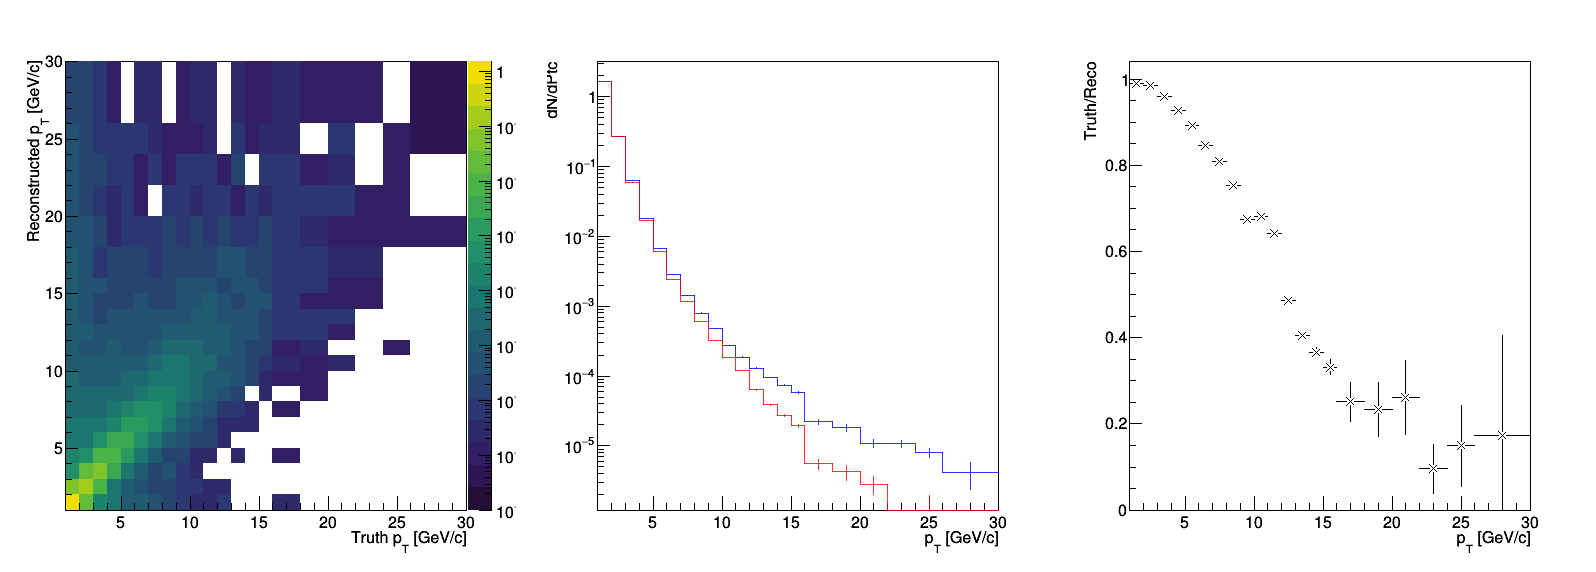

In [3]:
responseMatrix_counts00 = MCfile0.Get("hCorrelation_cor");
responseMatrix_counts00.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')


#print (responseMatrix_counts00.GetBinContent(0,0))
#print (responseMatrix_counts00.GetBinContent(responseMatrix_counts00.GetNbinsX()+1,responseMatrix_counts00.GetNbinsY()+1))
        
#responseMatrix_counts00.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts00.GetYaxis().SetRangeUser(1,15)

mc_truth_counts00 = responseMatrix_counts00.ProjectionX()
mc_reco_counts00 = responseMatrix_counts00.ProjectionY()


mc_truth_counts00.SetLineColorAlpha(2,0.8)
mc_reco_counts00.SetLineColorAlpha(4,0.8)

for ibin in range(1, mc_reco_counts00.GetNbinsX()+1):
    dpt = mc_reco_counts00.GetBinWidth(ibin)
    mc_reco_counts00.SetBinContent(ibin, mc_reco_counts00.GetBinContent(ibin)/dpt)
    mc_truth_counts00.SetBinContent(ibin, mc_truth_counts00.GetBinContent(ibin)/dpt)



##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts00.SetMinimum(1e-8)

responseMatrix_counts00.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts00,'MC Reco','L')
#label.Add(mc_truth_counts00,'MC True','L')
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

#mc_reco_counts00.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts00.GetXaxis().SetRangeUser(1,15)
mc_reco_counts00.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts00.Draw('histe')
mc_truth_counts00.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts00.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts00 = mc_truth_counts00.Clone()
ratio_mc_counts00.SetMinimum(0.0)
ratio_mc_counts00.SetLineColor(1)
ratio_mc_counts00.SetMarkerStyle(5)
#ratio_mc_counts00.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts00.Divide(mc_reco_counts00)
ratio_mc_counts00.Draw('e')
ratio_mc_counts00.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts00.GetNbinsX()+1):
    low = ratio_mc_counts00.GetBinLowEdge(i)
    center =   ratio_mc_counts00.GetBinCenter(i)
    high = ratio_mc_counts00.GetBinLowEdge(i+1)
    content =  ratio_mc_counts00.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

5.018313407897949
2.3929183043946978e-06
0.0 	 0.5 	 1.0 	 0.0
1.0 	 1.5 	 2.0 	 1.0070615909045548
2.0 	 2.5 	 3.0 	 0.98241150896389
3.0 	 3.5 	 4.0 	 0.9572722803128543
4.0 	 4.5 	 5.0 	 0.9256248591866238
5.0 	 5.5 	 6.0 	 0.8941102990743524
6.0 	 6.5 	 7.0 	 0.8528047229294256
7.0 	 7.5 	 8.0 	 0.8169316712622369
8.0 	 8.5 	 9.0 	 0.7574468246803998
9.0 	 9.5 	 10.0 	 0.6809895842225937
10.0 	 10.5 	 11.0 	 0.6732788862414327
11.0 	 11.5 	 12.0 	 0.6190476130300314
12.0 	 12.5 	 13.0 	 0.4690721609543869
13.0 	 13.5 	 14.0 	 0.34163701288073284
14.0 	 14.5 	 15.0 	 0.30143540145173425


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


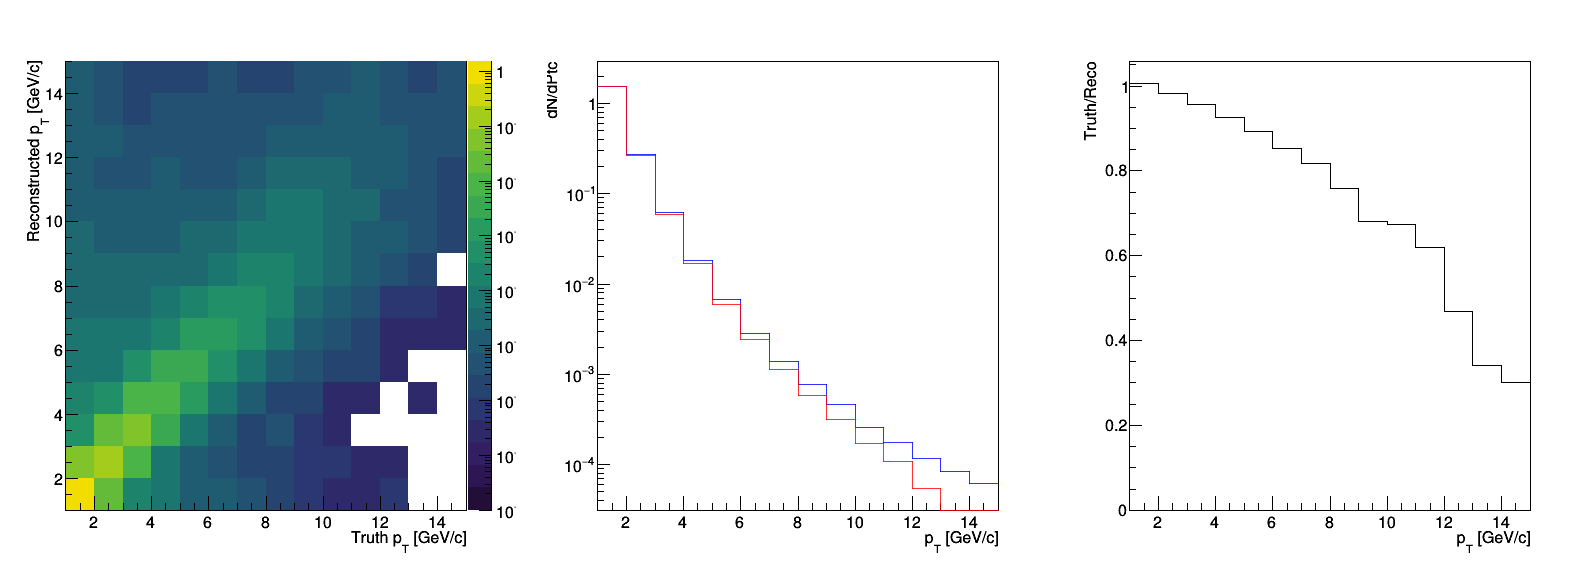

In [4]:
responseMatrix_counts0 = MCfile0.Get("hCorrelation_cor");
responseMatrix_counts0.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts0.GetBinContent(0,0))
print (responseMatrix_counts0.GetBinContent(responseMatrix_counts0.GetNbinsX()+1,responseMatrix_counts0.GetNbinsY()+1))
        
responseMatrix_counts00.GetXaxis().SetRangeUser(1,15)
responseMatrix_counts00.GetYaxis().SetRangeUser(1,15)

mc_truth_counts0 = responseMatrix_counts0.ProjectionX()
mc_reco_counts0 = responseMatrix_counts0.ProjectionY()


mc_truth_counts0.SetLineColorAlpha(2,0.8)
mc_reco_counts0.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts0.SetMinimum(1e-8)
#responseMatrix_counts0.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts0.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts0.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts0,'MC Reco','L')
#label.Add(mc_truth_counts0,'MC True','L')
#mc_reco_counts0.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts0.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts0.GetNbinsX()+1):
    dpt = mc_reco_counts0.GetBinWidth(ibin)
    mc_reco_counts0.SetBinContent(ibin, mc_reco_counts0.GetBinContent(ibin)/dpt)
    mc_truth_counts0.SetBinContent(ibin, mc_truth_counts0.GetBinContent(ibin)/dpt)
mc_reco_counts0.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts0.Draw('histe')
mc_truth_counts0.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts0.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts0 = mc_truth_counts0.Clone()
ratio_mc_counts0.SetMinimum(0.0)
ratio_mc_counts0.SetLineColor(1)
ratio_mc_counts0.SetMarkerStyle(5)
#ratio_mc_counts0.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts0.Divide(mc_reco_counts0)
ratio_mc_counts0.Draw('e')
ratio_mc_counts0.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts0.GetNbinsX()+1):
    low = ratio_mc_counts0.GetBinLowEdge(i)
    center =   ratio_mc_counts0.GetBinCenter(i)
    high = ratio_mc_counts0.GetBinLowEdge(i+1)
    content =  ratio_mc_counts0.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile1

0.0
62.0
-0.14117647058823532 	 0.004411764705882337 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8943114435209146
0.2 	 0.225 	 0.25 	 0.9946579116576766
0.25 	 0.275 	 0.3 	 1.0012174691620468
0.3 	 0.32499999999999996 	 0.35 	 1.008704906705142
0.35 	 0.375 	 0.4 	 1.009140692655754
0.4 	 0.42500000000000004 	 0.45 	 1.010089533693647
0.45 	 0.475 	 0.5 	 1.0093902967468584
0.5 	 0.525 	 0.55 	 1.0107267541106375
0.55 	 0.575 	 0.6 	 1.0099768960624258
0.6 	 0.625 	 0.65 	 1.006222672596596
0.65 	 0.675 	 0.7 	 1.005191645723406
0.7 	 0.725 	 0.75 	 1.0042549514727457
0.75 	 0.775 	 0.8 	 1.001818433829903
0.8 	 0.825 	 0.85 	 0.9955299164116633
0.85 	 0.875 	 0.9 	 0.9921153153153153
0.9 	 0.925 	 0.95 	 0.9910845424222042
0.95 	 0.975 	 1.0 	 0.9898688125670092
1.0 	 1.05 	 1.1 	 0.9885157231140346
1.1 	 1.15 	 1.2 	 0.9877108123030738
1.2 	 1.25 	 1.3 	 0.9900152061227749
1.3 	 1.35 	 1.4 	 0.9897666518899114
1.4 	 1.45 	 1.5 	 0.9872655646733938
1.5 	 1.55 	 1.6 	 0.99367875729755
1.6 	 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


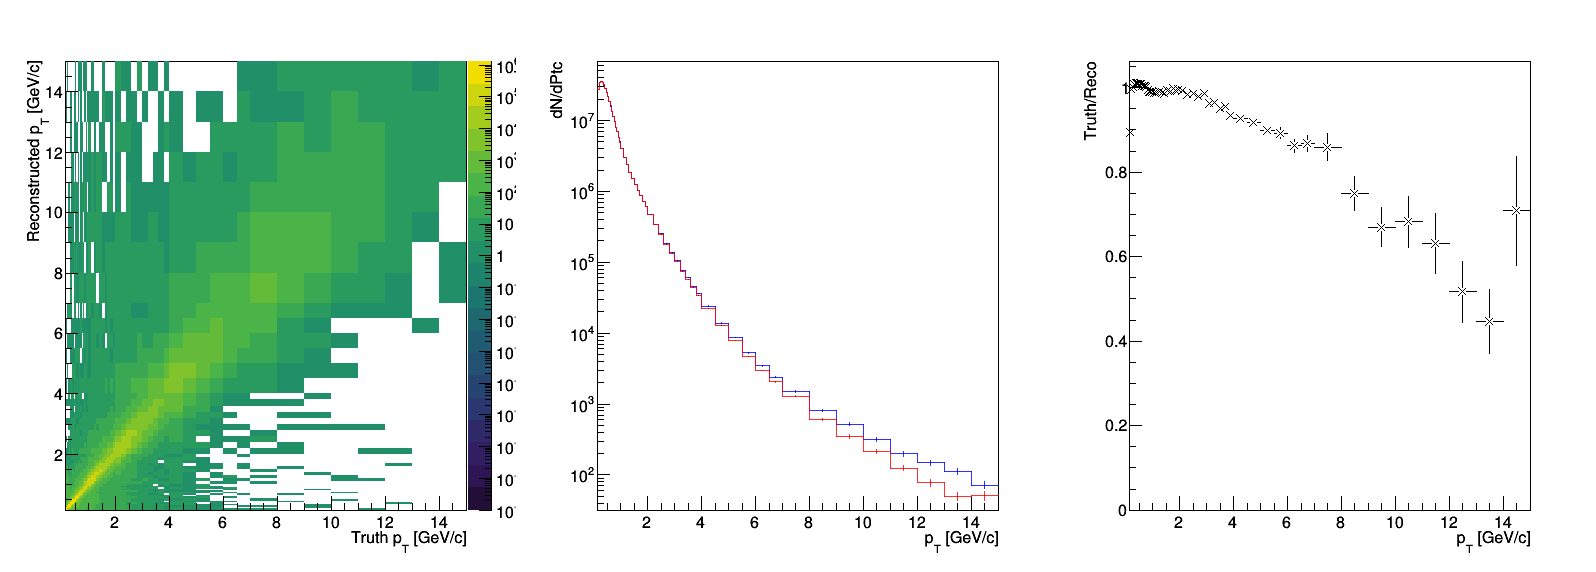

In [5]:
responseMatrix_counts1 = MCfile1.Get("hCorrelation");
responseMatrix_counts1.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts1.GetBinContent(0,0))
print (responseMatrix_counts1.GetBinContent(responseMatrix_counts1.GetNbinsX()+1,responseMatrix_counts1.GetNbinsY()+1))
        
mc_truth_counts1 = responseMatrix_counts1.ProjectionX()
mc_reco_counts1 = responseMatrix_counts1.ProjectionY()


mc_truth_counts1.SetLineColorAlpha(2,0.8)
mc_reco_counts1.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts1.SetMinimum(1e-8)
#responseMatrix_counts1.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts1.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts1.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts1,'MC Reco','L')
#label.Add(mc_truth_counts1,'MC True','L')
#mc_reco_counts1.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts1.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts1.GetNbinsX()+1):
    dpt = mc_reco_counts1.GetBinWidth(ibin)
    mc_reco_counts1.SetBinContent(ibin, mc_reco_counts1.GetBinContent(ibin)/dpt)
    mc_truth_counts1.SetBinContent(ibin, mc_truth_counts1.GetBinContent(ibin)/dpt)
mc_reco_counts1.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts1.Draw('histe')
mc_truth_counts1.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts1.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts1 = mc_truth_counts1.Clone()
ratio_mc_counts1.SetMinimum(0.0)
ratio_mc_counts1.SetLineColor(1)
ratio_mc_counts1.SetMarkerStyle(5)
#ratio_mc_counts1.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts1.Divide(mc_reco_counts1)
ratio_mc_counts1.Draw('e')
ratio_mc_counts1.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts1.GetNbinsX()+1):
    low = ratio_mc_counts1.GetBinLowEdge(i)
    center =   ratio_mc_counts1.GetBinCenter(i)
    high = ratio_mc_counts1.GetBinLowEdge(i+1)
    content =  ratio_mc_counts1.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile2

0.0
16.0
-0.38648648648648654 	 -0.11824324324324326 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8943114435209146
0.2 	 0.225 	 0.25 	 0.9946579116576766
0.25 	 0.275 	 0.3 	 1.0012174691620468
0.3 	 0.32499999999999996 	 0.35 	 1.008704906705142
0.35 	 0.375 	 0.4 	 1.009140692655754
0.4 	 0.42500000000000004 	 0.45 	 1.010089533693647
0.45 	 0.475 	 0.5 	 1.0093902967468584
0.5 	 0.525 	 0.55 	 1.0107267541106375
0.55 	 0.575 	 0.6 	 1.0099768960624258
0.6 	 0.625 	 0.65 	 1.006222672596596
0.65 	 0.675 	 0.7 	 1.005191645723406
0.7 	 0.725 	 0.75 	 1.0042549514727457
0.75 	 0.775 	 0.8 	 1.001818433829903
0.8 	 0.825 	 0.85 	 0.9955299164116633
0.85 	 0.875 	 0.9 	 0.9921153153153153
0.9 	 0.925 	 0.95 	 0.9910845424222042
0.95 	 0.975 	 1.0 	 0.9898688125670092
1.0 	 1.05 	 1.1 	 0.9885157231140346
1.1 	 1.15 	 1.2 	 0.9877108123030738
1.2 	 1.2999999999999998 	 1.4 	 0.9899057826016417
1.4 	 1.5 	 1.6 	 0.9901668129938542
1.6 	 1.7000000000000002 	 1.8 	 0.994517366033827
1.8 	 1.9 	 2.0 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


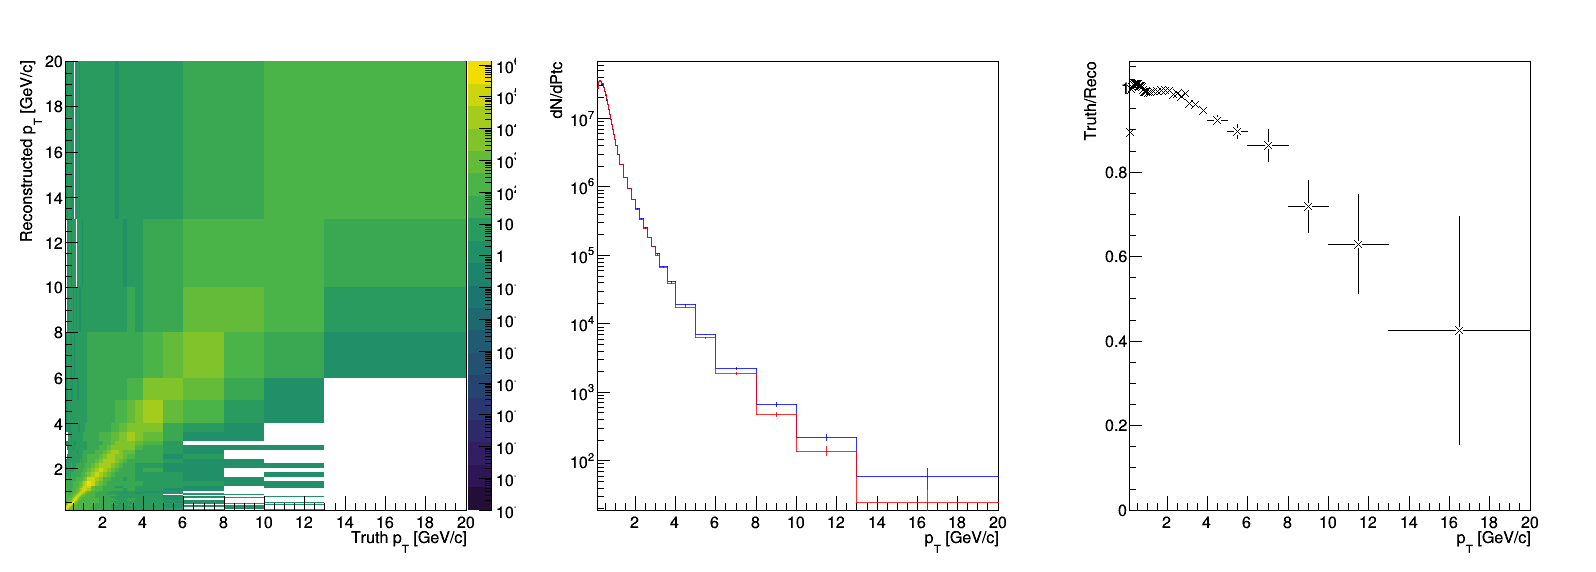

In [6]:
responseMatrix_counts2 = MCfile2.Get("hCorrelation");
responseMatrix_counts2.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts2.GetBinContent(0,0))
print (responseMatrix_counts2.GetBinContent(responseMatrix_counts2.GetNbinsX()+1,responseMatrix_counts2.GetNbinsY()+1))
        
mc_truth_counts2 = responseMatrix_counts2.ProjectionX()
mc_reco_counts2 = responseMatrix_counts2.ProjectionY()


mc_truth_counts2.SetLineColorAlpha(2,0.8)
mc_reco_counts2.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts2.SetMinimum(1e-8)
#responseMatrix_counts2.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts2.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts2.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts2,'MC Reco','L')
#label.Add(mc_truth_counts2,'MC True','L')
#mc_reco_counts2.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts2.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts2.GetNbinsX()+1):
    dpt = mc_reco_counts2.GetBinWidth(ibin)
    mc_reco_counts2.SetBinContent(ibin, mc_reco_counts2.GetBinContent(ibin)/dpt)
    mc_truth_counts2.SetBinContent(ibin, mc_truth_counts2.GetBinContent(ibin)/dpt)
mc_reco_counts2.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts2.Draw('histe')
mc_truth_counts2.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts2.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts2 = mc_truth_counts2.Clone()
ratio_mc_counts2.SetMinimum(0.0)
ratio_mc_counts2.SetLineColor(1)
ratio_mc_counts2.SetMarkerStyle(5)
#ratio_mc_counts2.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts2.Divide(mc_reco_counts2)
ratio_mc_counts2.Draw('e')
ratio_mc_counts2.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts2.GetNbinsX()+1):
    low = ratio_mc_counts2.GetBinLowEdge(i)
    center =   ratio_mc_counts2.GetBinCenter(i)
    high = ratio_mc_counts2.GetBinLowEdge(i+1)
    content =  ratio_mc_counts2.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile3

0.0
1.9999999949504854e-06
-0.3646551724137931 	 -0.10732758620689653 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.9639446230929638
0.2 	 0.225 	 0.25 	 0.996051372635764
0.25 	 0.275 	 0.3 	 1.0018188895011617
0.3 	 0.32499999999999996 	 0.35 	 1.0090682387415155
0.35 	 0.375 	 0.4 	 1.0094761696895278
0.4 	 0.42500000000000004 	 0.45 	 1.0104776559201565
0.45 	 0.475 	 0.5 	 1.009789227488172
0.5 	 0.525 	 0.55 	 1.0111580180968271
0.55 	 0.575 	 0.6 	 1.0104160320759652
0.6 	 0.625 	 0.65 	 1.0065930495198034
0.65 	 0.675 	 0.7 	 1.0053924210134515
0.7 	 0.725 	 0.75 	 1.0042380773390724
0.75 	 0.775 	 0.8 	 1.000967239727162
0.8 	 0.825 	 0.85 	 0.9924003314290741
0.85 	 0.875 	 0.9 	 0.9838856175421339
0.9 	 0.925 	 0.95 	 0.9747555991258297
0.95 	 0.975 	 1.0 	 0.9651974773886243
1.0 	 1.05 	 1.1 	 0.9546031155176947
1.1 	 1.15 	 1.2 	 0.9644955380346518
1.2 	 1.25 	 1.3 	 0.9824844506930113
1.3 	 1.35 	 1.4 	 0.9878114357372216
1.4 	 1.45 	 1.5 	 0.9870029057517904
1.5 	 1.55 	 1.6 	 0.9

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


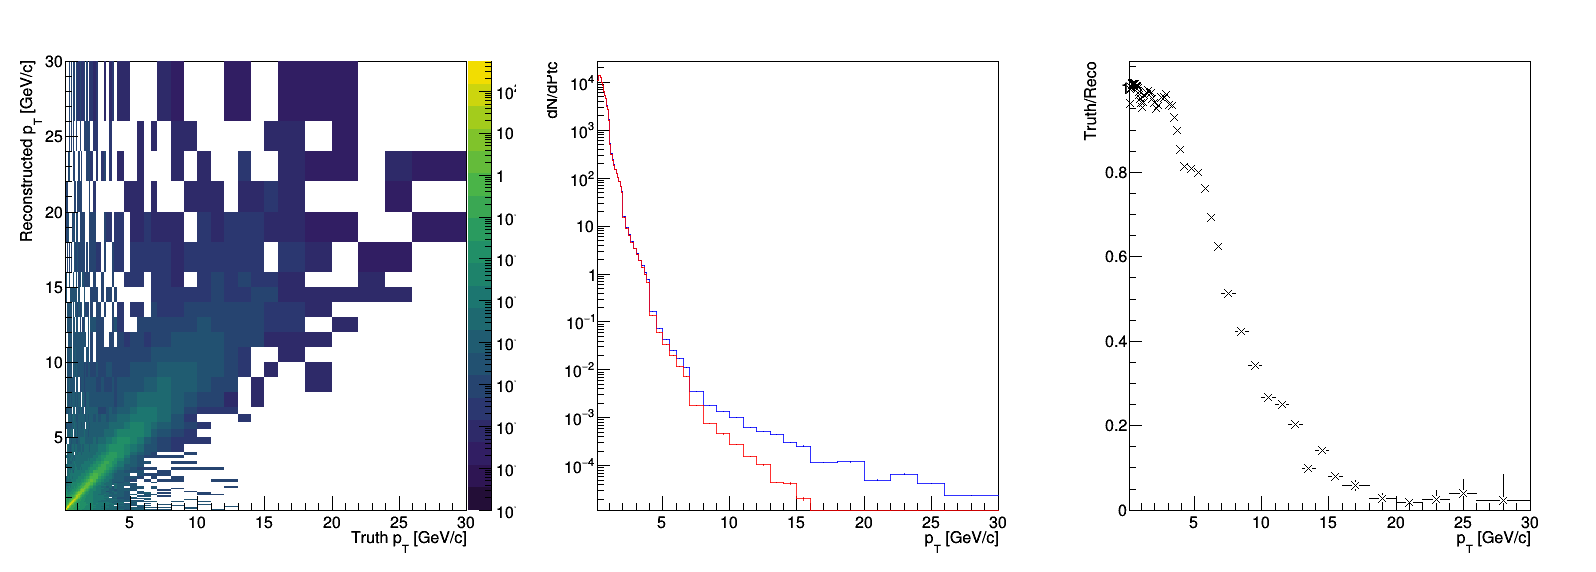

In [7]:
responseMatrix_counts3 = MCfile3.Get("hCorrelation_cor");
responseMatrix_counts3.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts3.GetBinContent(0,0))
print (responseMatrix_counts3.GetBinContent(responseMatrix_counts3.GetNbinsX()+1,responseMatrix_counts3.GetNbinsY()+1))
        
mc_truth_counts3 = responseMatrix_counts3.ProjectionX()
mc_reco_counts3 = responseMatrix_counts3.ProjectionY()


mc_truth_counts3.SetLineColorAlpha(2,0.8)
mc_reco_counts3.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts3.SetMinimum(1e-8)
#responseMatrix_counts3.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts3.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts3.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts3,'MC Reco','L')
#label.Add(mc_truth_counts3,'MC True','L')
#mc_reco_counts3.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts3.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts3.GetNbinsX()+1):
    dpt = mc_reco_counts3.GetBinWidth(ibin)
    mc_reco_counts3.SetBinContent(ibin, mc_reco_counts3.GetBinContent(ibin)/dpt)
    mc_truth_counts3.SetBinContent(ibin, mc_truth_counts3.GetBinContent(ibin)/dpt)
mc_reco_counts3.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts3.Draw('histe')
mc_truth_counts3.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts3.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts3 = mc_truth_counts3.Clone()
ratio_mc_counts3.SetMinimum(0.0)
ratio_mc_counts3.SetLineColor(1)
ratio_mc_counts3.SetMarkerStyle(5)
#ratio_mc_counts3.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts3.Divide(mc_reco_counts3)
ratio_mc_counts3.Draw('e')
ratio_mc_counts3.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts3.GetNbinsX()+1):
    low = ratio_mc_counts3.GetBinLowEdge(i)
    center =   ratio_mc_counts3.GetBinCenter(i)
    high = ratio_mc_counts3.GetBinLowEdge(i+1)
    content =  ratio_mc_counts3.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile4

0.0
183.0
-0.38648648648648654 	 -0.11824324324324326 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8945015343515567
0.2 	 0.225 	 0.25 	 0.9935756031360541
0.25 	 0.275 	 0.3 	 1.0027068214082115
0.3 	 0.32499999999999996 	 0.35 	 1.0077919816164047
0.35 	 0.375 	 0.4 	 1.0091298983266401
0.4 	 0.42500000000000004 	 0.45 	 1.0105990206172328
0.45 	 0.475 	 0.5 	 1.0101002686743066
0.5 	 0.525 	 0.55 	 1.0106295245732633
0.55 	 0.575 	 0.6 	 1.0089947470098075
0.6 	 0.625 	 0.65 	 1.0068990812051866
0.65 	 0.675 	 0.7 	 1.0057915660528387
0.7 	 0.725 	 0.75 	 1.0028018157936074
0.75 	 0.775 	 0.8 	 1.0003192313686824
0.8 	 0.825 	 0.85 	 0.9965583097236004
0.85 	 0.875 	 0.9 	 0.9936500577225331
0.9 	 0.925 	 0.95 	 0.9917793052578063
0.95 	 0.975 	 1.0 	 0.9883670328595059
1.0 	 1.05 	 1.1 	 0.9886062459777591
1.1 	 1.15 	 1.2 	 0.9876028153132467
1.2 	 1.2999999999999998 	 1.4 	 0.989024802189012
1.4 	 1.5 	 1.6 	 0.9913871864758056
1.6 	 1.7000000000000002 	 1.8 	 0.9952269158326585
1.8 	 1.9

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


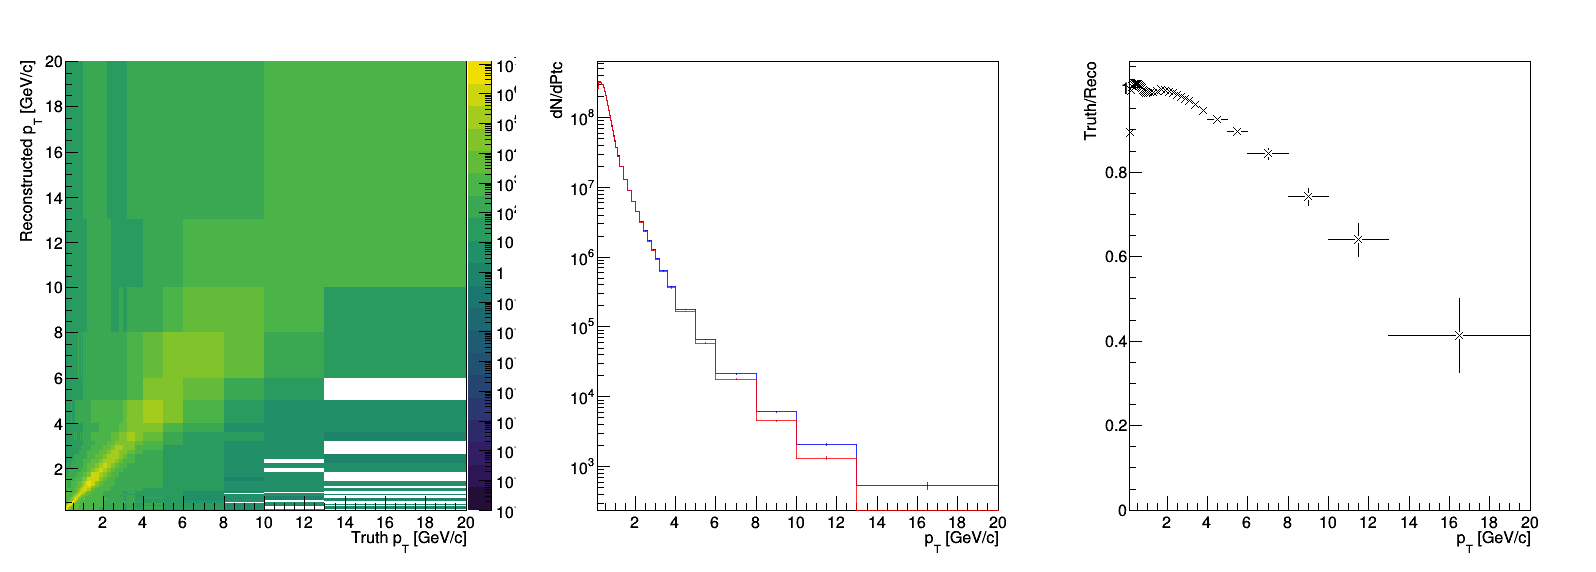

In [8]:
responseMatrix_counts4 = MCfile4.Get("hCorrelation");
responseMatrix_counts4.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts4.GetBinContent(0,0))
print (responseMatrix_counts4.GetBinContent(responseMatrix_counts4.GetNbinsX()+1,responseMatrix_counts4.GetNbinsY()+1))
        
mc_truth_counts4 = responseMatrix_counts4.ProjectionX()
mc_reco_counts4 = responseMatrix_counts4.ProjectionY()


mc_truth_counts4.SetLineColorAlpha(2,0.8)
mc_reco_counts4.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts4.SetMinimum(1e-8)
#responseMatrix_counts4.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts4.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts4.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts4,'MC Reco','L')
#label.Add(mc_truth_counts4,'MC True','L')
#mc_reco_counts4.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts4.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts4.GetNbinsX()+1):
    dpt = mc_reco_counts4.GetBinWidth(ibin)
    mc_reco_counts4.SetBinContent(ibin, mc_reco_counts4.GetBinContent(ibin)/dpt)
    mc_truth_counts4.SetBinContent(ibin, mc_truth_counts4.GetBinContent(ibin)/dpt)
mc_reco_counts4.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts4.Draw('histe')
mc_truth_counts4.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts4.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts4 = mc_truth_counts4.Clone()
ratio_mc_counts4.SetMinimum(0.0)
ratio_mc_counts4.SetLineColor(1)
ratio_mc_counts4.SetMarkerStyle(5)
#ratio_mc_counts4.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts4.Divide(mc_reco_counts4)
ratio_mc_counts4.Draw('e')
ratio_mc_counts4.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts4.GetNbinsX()+1):
    low = ratio_mc_counts4.GetBinLowEdge(i)
    center =   ratio_mc_counts4.GetBinCenter(i)
    high = ratio_mc_counts4.GetBinLowEdge(i+1)
    content =  ratio_mc_counts4.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

-0.38648648648648654 	 -0.11824324324324326 	 0.15 	 0.06585949659347534 	 6.53021697086495e-05 	 0.0009915376382503194
0.15 	 0.175 	 0.2 	 0.7644153237342834 	 0.00028890658636334787 	 0.0003779445249108768
0.2 	 0.225 	 0.25 	 0.960606575012207 	 0.0003518057847854347 	 0.0003662329552355646
0.25 	 0.275 	 0.3 	 0.9912490248680115 	 0.0003614725145923401 	 0.0003646636773644963
0.3 	 0.32499999999999996 	 0.35 	 0.9595580697059631 	 0.0003479541619261441 	 0.0003626191815913418
0.35 	 0.375 	 0.4 	 0.8884008526802063 	 0.00032106526491649265 	 0.0003613968446201673
0.4 	 0.42500000000000004 	 0.45 	 0.8412073850631714 	 0.000311620585953766 	 0.0003704444248671979
0.45 	 0.475 	 0.5 	 0.8467597961425781 	 0.0003354685698664531 	 0.000396179142414039
0.5 	 0.525 	 0.55 	 0.8509509563446045 	 0.00036073023556672603 	 0.00042391424896717935
0.55 	 0.575 	 0.6 	 0.8539926409721375 	 0.0003924936506861607 	 0.0004595983991611074
0.6 	 0.625 	 0.65 	 0.8556569218635559 	 0.000424681354800

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


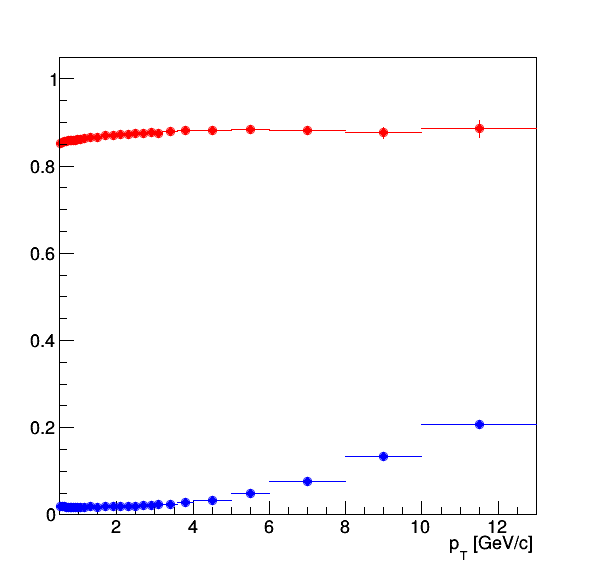

In [26]:
#Get efficiency and fake rate
efficiency = MCfile4.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile4.Get("hTruth"))
fakerate   = MCfile4.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.05)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(0.5,13)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
#efficiency.Fit('pol0', '', '', 2,20)
efficiency.Draw('e')
fakerate.Draw('samee')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_pPb_halfGeV13GeV.png')

sum = 0.0
for i in range(efficiency.GetNbinsX()):
    low = efficiency.GetBinLowEdge(i)
    center =   efficiency.GetBinCenter(i)
    high = efficiency.GetBinLowEdge(i+1)
    content =  efficiency.GetBinContent(i)
    error =  efficiency.GetBinError(i)
    print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
    #sum += (error/content)**2

print ("\n\n")

for i in range(fakerate.GetNbinsX()+1):
    low = fakerate.GetBinLowEdge(i)
    center =   fakerate.GetBinCenter(i)
    high = fakerate.GetBinLowEdge(i+1)
    content =  fakerate.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file trackCorrectionFactors_pPb_fullStats.png has been created


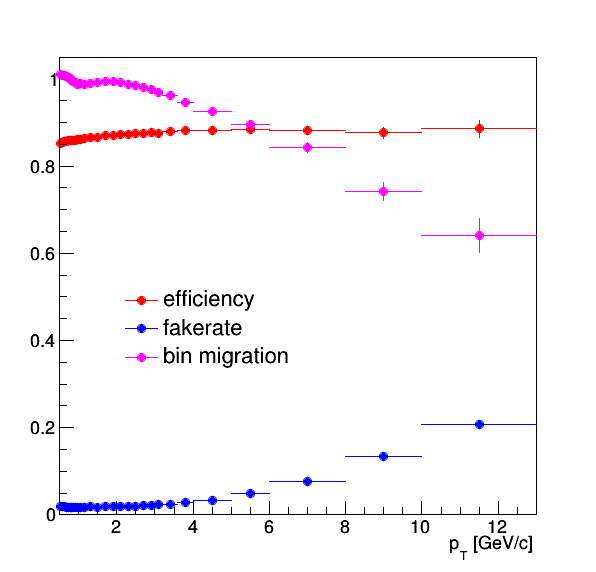

In [27]:
ratio_mc_counts00.SetLineColor(7)#cyan
ratio_mc_counts00.SetMarkerColor(7)
ratio_mc_counts00.SetMarkerStyle(30)
ratio_mc_counts00.GetXaxis().SetRangeUser(1,20)

ratio_mc_counts0.SetLineColor(1)#black
ratio_mc_counts0.SetMarkerColor(1)
ratio_mc_counts0.SetMarkerStyle(24)
ratio_mc_counts0.GetXaxis().SetRangeUser(1,20)

ratio_mc_counts1.SetLineColor(2)#red
ratio_mc_counts1.SetMarkerColor(2)
ratio_mc_counts1.SetMarkerStyle(25)
ratio_mc_counts4.GetXaxis().SetRangeUser(1,20)

ratio_mc_counts2.SetLineColor(3)#green
ratio_mc_counts2.SetMarkerColor(3)
ratio_mc_counts2.SetMarkerStyle(26)
ratio_mc_counts3.GetXaxis().SetRangeUser(1,20)

ratio_mc_counts3.SetLineColor(4)#blue
ratio_mc_counts3.SetMarkerColor(4)
ratio_mc_counts3.SetMarkerStyle(27)
ratio_mc_counts3.GetXaxis().SetRangeUser(1,20)

ratio_mc_counts4.SetLineColor(6)#magenta
ratio_mc_counts4.SetMarkerColor(6)
ratio_mc_counts4.SetMarkerStyle(20)
ratio_mc_counts4.GetXaxis().SetRangeUser(0.5,12)

legend = ROOT.TLegend(0.2, 0.35, 0.5, 0.5)
legend.SetBorderSize(0)
#legend.SetName("pPb bin migration effect")
#legend.AddEntry(ratio_mc_counts00, "1 GeV binnning tracking study(\"corrected old\")")
#legend.AddEntry(ratio_mc_counts0, "1 GeV binnning tracking study wRangeSet 1-15 (old)")
#legend.AddEntry(ratio_mc_counts1, "variable binning(new)")
#legend.AddEntry(ratio_mc_counts2, "pp binning-sent to fernando")
#legend.AddEntry(ratio_mc_counts4, "all events pp binning")

legend.AddEntry(efficiency, "efficiency")
legend.AddEntry(fakerate, "fakerate")
legend.AddEntry(ratio_mc_counts4, "bin migration")


c = ROOT.TCanvas('c','c',600,600)
#ratio_mc_counts00.Draw('e')
#ratio_mc_counts0.Draw('samee')
#ratio_mc_counts1.Draw('samee')
#ratio_mc_counts2.Draw('samee')
#ratio_mc_counts3.Draw('samee')
efficiency.Draw('e')
fakerate.Draw('samee')
ratio_mc_counts4.Draw('samee')


legend.Draw("same")
c.Update()
c.Draw()

#c.SaveAs("binMigrationEffect_pPb.png")
#c.SaveAs("binMigrationEffect_pPb_fullStats.png")
c.SaveAs("trackCorrectionFactors_pPb_fullStats.png")